# CS551J_Assessment 2_52097136

## Student Information
Student: ZHIXI TANG \
Student ID: 52097136

## Abstract
This is a project report to build up a knowledge graph about COVID-19 vaccines, and reprensting the knowledge graph, mapping the vacubulary on the known ontology, simulating answer questions by using SPARQL to query the graph.

## 1. Collect the data from websites

As I don't have enough perception for NLP, I won't use crawler to collect the data from internet. I will use Requests and BeautifulSoup of Python to parse the contents of webpage. To keep the content data as clean as possible, I will manully choose some websites that the contents are related to COVID-19 vaccine. 

### Chosen websites
The websites I manually chosen are:
- wikipedia: https://en.wikipedia.org/wiki/COVID-19_vaccine
- science: https://science.sciencemag.org/content/371/6532/916
- CDC, introduction of COVID-19 vaccine:https://www.cdc.gov/coronavirus/2019-ncov/vaccines/different-vaccines/how-they-work.html?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fcoronavirus%2F2019-ncov%2Fvaccines%2Fabout-vaccines%2Fhow-they-work.html
- NHS: https://www.nhs.uk/conditions/coronavirus-covid-19/coronavirus-vaccination/coronavirus-vaccine/
- Texas HHS: https://dshs.texas.gov/coronavirus/immunize/vaccine.aspx

### Collect the Data

In [ ]:
# Using requests and bs4 to get the web contents from above websites
import requests
import bs4

# Creating a list to save these website links
webs = [
        'https://en.wikipedia.org/wiki/COVID-19_vaccine',
        'https://science.sciencemag.org/content/371/6532/916',
        'https://www.cdc.gov/coronavirus/2019-ncov/vaccines/different-vaccines/how-they-work.html?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fcoronavirus%2F2019-ncov%2Fvaccines%2Fabout-vaccines%2Fhow-they-work.html',
        'https://www.nhs.uk/conditions/coronavirus-covid-19/coronavirus-vaccination/coronavirus-vaccine/',
        'https://dshs.texas.gov/coronavirus/immunize/vaccine.aspx'
]

# Iterval these websites, get the information
webContents = ''
for web in webs:
  url = web
  res = requests.get(url, verify=False)  # Currently I am in home with the online course, to avoid SSL issues, set verify=Flase
  html_page = res.content
  soup = bs4.BeautifulSoup(html_page, 'html.parser')
  webContents += soup.get_text()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

After this step we should have collected all the website texts and saved them to variable 'webContents', I will verify it.

In [ ]:
print(webContents)





COVID-19 vaccine - Wikipedia
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YEIrsjRJ5mO4WxCjdHih7wAAAM4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"COVID-19_vaccine","wgTitle":"COVID-19 vaccine","wgCurRevisionId":1010386361,"wgRevisionId":1010386361,"wgArticleId":63319438,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","CS1 maint: uses authors parameter","CS1 Spanish-language sources (es)","CS1 German-language sources (de)","CS1 Portuguese-language sources (pt)","CS1 Danish-language sources (da)","CS1 Icelandic-language sources (is)",
"CS1 Norwegian 

Then I will shortlist the web contents to sentences. I will use nltk module of python.

In [ ]:
import nltk
nltk.download('punkt')
from nltk import tokenize

sentences = tokenize.sent_tokenize(webContents)

# printing sentences to verify
import pprint
pprint.pprint(sentences)

流式输出内容被截断，只能显示最后 5000 行内容。
 'chart\n'
 'Czech Republic\n'
 'chart\n'
 'Denmark\n'
 'chart\n'
 'Estonia\n'
 'chart\n'
 'Faroe Islands\n'
 'chart\n'
 'Finland\n'
 'chart\n'
 'France\n'
 'chart\n'
 'Germany\n'
 'chart\n'
 'Greece\n'
 'chart\n'
 'Hungary\n'
 'chart\n'
 'Iceland\n'
 'chart\n'
 'Ireland\n'
 'chart\n'
 'Italy\n'
 'chart\n'
 'Kosovo\n'
 'chart\n'
 'Latvia\n'
 'chart\n'
 'Lithuania\n'
 'chart\n'
 'Luxembourg\n'
 'chart\n'
 'Malta\n'
 'chart\n'
 'Moldova\n'
 'chart\n'
 'Monaco\n'
 'chart\n'
 'Montenegro\n'
 'chart\n'
 'Netherlands\n'
 'chart\n'
 'North Macedonia\n'
 'chart\n'
 'Norway\n'
 'chart\n'
 'Poland\n'
 'chart\n'
 'Portugal\n'
 'chart\n'
 'Romania\n'
 'chart\n'
 'Russia\n'
 'by federal subject\n'
 'chart\n'
 'San Marino\n'
 'chart\n'
 'Serbia\n'
 'chart\n'
 'Slovakia\n'
 'by region\n'
 'chart\n'
 'Slovenia\n'
 'chart\n'
 'Spain\n'
 'chart\n'
 'Asturias\n'
 'Community of Madrid\n'
 'Sweden\n'
 'chart\n'
 'Switzerland\n'
 'chart\n'
 'Turkey\n'
 'by province\n'
 'chart\n'
 

## 2. Cleaning the Data

In this part, we will try the best to clean the data. 

### 2.1 Cleaning the Data - 1

From the above output, we can see variable 'sentences' is a list consisting of many strings with format 'str' (in python). 
Basically, each string should be represented as a completed sentence. In the output, we can see there many strings are just '\t', '\n', ,html tags, or codes. So we will simply delete these strings from sentences.
- delete sentences consisting of '\n'
- delete sentences consisting of '\t'
- delete sentences consisting of only one work
- delete sentences consisting of html tags
- delete sentences consisting of javascript codes

Wow! I suddently think of we actually could also use Regular expression! A standard English sentence should be format like this: word + ' ' + word + ' ' + ... + 'word'


In [ ]:
import re

# delete sentences consisting of '\n', '\t', html tags, and javascript codes
clean_sents = []
sent_pattern = r'\b([a-zA-z]+)(.*)'

for sent in sentences:
  result = re.match(sent_pattern, sent)
  if result:
    clean_sents.append(result.group())

# pprint.pprint(clean_sents)


### 2.2 Clean the data - 2
After the above step, we stil have some issue left. For instance, some sentences don't have period mark('.'), the full sentence should be the sentence + the sentence in the next line which has a period mark. So we will combine this type of sentence to let it become a full sentence. 
If in the line doesn't have a period mark, it means the sentence is too long to structured, we don't count it. 


In [ ]:
i = 0
clean_sents_2 = []
while i < len(clean_sents)-1:
  if '.' in clean_sents[i]:
    clean_sents_2.append(clean_sents[i])
    i += 1
  elif '.' in clean_sents[i+1]:
    clean_sents_2.append(clean_sents[i]+clean_sents[i+1])
    i += 2
  else:
    j = i + 2
    while j < len(clean_sents)-1:
      if '.' in clean_sents[j]:
        i = j+1
        break
      j += 1
pprint.pprint(clean_sents_2)


['As of February\xa02021[update], eleven vaccines are authorized by at least '
 'one national regulatory authority for public use: two RNA vaccines (the '
 'Pfizer–BioNTech vaccine and the Moderna vaccine), four conventional '
 'inactivated vaccines (BBIBP-CorV, Covaxin, CoronaVac, and CoviVac), four '
 'viral vector vaccines (Sputnik V, the Oxford–AstraZeneca vaccine, '
 'Convidicea, and the Johnson & Johnson vaccine), and one peptide vaccine '
 '(EpiVacCorona).',
 'Moderna targets producing 600 million doses and Convidicea 500 million doses '
 'in 2021.',
 'Prior to COVID‑19, a vaccine for an infectious disease had never been '
 'produced in less than several years—and no vaccine existed for preventing a '
 'coronavirus infection in humans.',
 'Vaccines against SARS[12] and MERS[13] have been tested in non-human '
 'animals.',
 'According to studies published in 2005 and 2006, the identification and '
 'development of novel vaccines and medicines to treat SARS was a priority for '
 '

### 2.3 Clean the data - 3

We will only keep the sentences that the length greater than 65. 
We will delete the sentences which are url.

In [ ]:
clean_sents_3 = []
for sent in clean_sents_2:
  if len(sent) > 50 and 'http' not in sent:
    clean_sents_3.append(sent)

pprint.pprint(clean_sents_3)

['As of February\xa02021[update], eleven vaccines are authorized by at least '
 'one national regulatory authority for public use: two RNA vaccines (the '
 'Pfizer–BioNTech vaccine and the Moderna vaccine), four conventional '
 'inactivated vaccines (BBIBP-CorV, Covaxin, CoronaVac, and CoviVac), four '
 'viral vector vaccines (Sputnik V, the Oxford–AstraZeneca vaccine, '
 'Convidicea, and the Johnson & Johnson vaccine), and one peptide vaccine '
 '(EpiVacCorona).',
 'Moderna targets producing 600 million doses and Convidicea 500 million doses '
 'in 2021.',
 'Prior to COVID‑19, a vaccine for an infectious disease had never been '
 'produced in less than several years—and no vaccine existed for preventing a '
 'coronavirus infection in humans.',
 'Vaccines against SARS[12] and MERS[13] have been tested in non-human '
 'animals.',
 'According to studies published in 2005 and 2006, the identification and '
 'development of novel vaccines and medicines to treat SARS was a priority for '
 '

### 2.4 Clean the data - 4

Until now, the left sentences only contains some cites of the authors, press sections. 
From here we will save the data into .csv file, then we will delete the useless sentences without meaning manually. Then we will name a new .csv file with 'data_new.csv'. The sentences in this file are almost clean. 

In [ ]:
import csv

with open('data.csv', 'w', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(['sentence'])
  for row in clean_sents_3:
    writer.writerow([str(row)])

## 3. Extract sentece to triples

From this part, we will load the contents from 'data_new.csv', the extrace the sentence to triples, with format of (subject, predict, object) \\
We will use the toolkit, NLPTriples.

In [ ]:
# install NLPTriples
!pip3 install nlptriples

     |████████████████████████████████| 110.5MB 47kB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 3.8MB 37.6MB/s 
     |████████████████████████████████| 512kB 41.4MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
  Created wheel for benepar: filename=benepar-0.1.3-cp37-cp37m-linux_x86_64.whl size=104432 sha256=50726b5b8bdb1b95d31e702efa4185b34f156d3358952960000c6f7cc24542fc
  Stored in directory: /root/.cache/pip/wheels/31/1d/e6/7aa04452c51e7d9ee78d876cb65a66d95f4993b54730d9e2cd
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=163ff1ec1ff6742401a3052c809ae5897384590d926bace6c84d169c78a90a7e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built benepar gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
   

In [10]:
import pandas as pd

candidate_sentences = pd.read_csv('data_new++.csv')
candidate_sentences.shape

(282, 1)

In [11]:
candidate_sentences['sentence'].sample(5)

sample_candidate = candidate_sentences['sentence'].sample(5)

89     The problem of vaccine prioritization also par...
278    V-safe  Register with CDC is V-safe After Vacc...
62     This also goes for compensation for hidden def...
30     Total dose counts for these countries are not ...
190    Although these modeling efforts focus on age a...
Name: sentence, dtype: object

In [180]:
from nlptriples import triples, setup
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
%matplotlib inline

# f = open('extracted_sentence.csv', 'w', encoding='utf-8')
# f_wirter = csv.writer(f)
# f_wirter.writerow(['extracted sentences'])
triple_list = []
sent_list = []
for i in tqdm(candidate_sentences['sentence']):
  sent = i
  rdf = triples.RDF_triple()
  try:
    triple = rdf.extract(sent)
    triple_list.append(triple)
    sent_list.append(sent)
  except Exception as err:
    print("this sentence couldn't be extracted.")
    continue
print(len(triple_list))
print(len(sent_list))

  1%|          | 2/282 [00:12<29:13,  6.26s/it]

this sentence couldn't be extracted.


  1%|          | 3/282 [00:18<28:52,  6.21s/it]

this sentence couldn't be extracted.


  7%|▋         | 19/282 [01:52<25:57,  5.92s/it]

this sentence couldn't be extracted.


  7%|▋         | 20/282 [01:58<25:27,  5.83s/it]

this sentence couldn't be extracted.


 12%|█▏        | 35/282 [03:26<23:48,  5.78s/it]

this sentence couldn't be extracted.


 15%|█▍        | 41/282 [04:01<23:34,  5.87s/it]

this sentence couldn't be extracted.


 16%|█▌        | 44/282 [04:19<23:19,  5.88s/it]

this sentence couldn't be extracted.


 16%|█▌        | 45/282 [04:25<23:24,  5.92s/it]

this sentence couldn't be extracted.


 17%|█▋        | 47/282 [04:37<22:57,  5.86s/it]

this sentence couldn't be extracted.


 17%|█▋        | 48/282 [04:43<23:01,  5.90s/it]

this sentence couldn't be extracted.


 17%|█▋        | 49/282 [04:49<23:04,  5.94s/it]

this sentence couldn't be extracted.


 18%|█▊        | 52/282 [05:07<22:41,  5.92s/it]

this sentence couldn't be extracted.


 19%|█▉        | 53/282 [05:12<22:15,  5.83s/it]

this sentence couldn't be extracted.


 21%|██        | 58/282 [05:42<22:27,  6.02s/it]

this sentence couldn't be extracted.


 21%|██        | 59/282 [05:48<22:04,  5.94s/it]

this sentence couldn't be extracted.


 22%|██▏       | 61/282 [06:00<22:20,  6.07s/it]

this sentence couldn't be extracted.


 30%|██▉       | 84/282 [08:19<20:32,  6.23s/it]

this sentence couldn't be extracted.


 36%|███▌      | 102/282 [10:09<18:13,  6.08s/it]

this sentence couldn't be extracted.


 38%|███▊      | 106/282 [10:35<19:02,  6.49s/it]

this sentence couldn't be extracted.


 38%|███▊      | 107/282 [10:40<18:10,  6.23s/it]

this sentence couldn't be extracted.


 38%|███▊      | 108/282 [10:46<17:53,  6.17s/it]

this sentence couldn't be extracted.


 39%|███▉      | 111/282 [11:05<17:36,  6.18s/it]

this sentence couldn't be extracted.


 40%|████      | 113/282 [11:17<17:11,  6.11s/it]

this sentence couldn't be extracted.


 41%|████      | 116/282 [11:35<16:40,  6.03s/it]

this sentence couldn't be extracted.


 42%|████▏     | 119/282 [11:54<16:22,  6.03s/it]

this sentence couldn't be extracted.


 43%|████▎     | 120/282 [12:00<16:23,  6.07s/it]

this sentence couldn't be extracted.


 43%|████▎     | 121/282 [12:06<16:29,  6.15s/it]

this sentence couldn't be extracted.


 43%|████▎     | 122/282 [12:12<16:08,  6.05s/it]

this sentence couldn't be extracted.


 44%|████▎     | 123/282 [12:18<16:18,  6.16s/it]

this sentence couldn't be extracted.


 44%|████▍     | 124/282 [12:25<16:29,  6.26s/it]

this sentence couldn't be extracted.


 46%|████▌     | 129/282 [12:55<15:32,  6.09s/it]

this sentence couldn't be extracted.


 46%|████▌     | 130/282 [13:01<15:24,  6.08s/it]

this sentence couldn't be extracted.


 48%|████▊     | 135/282 [13:31<14:42,  6.01s/it]

this sentence couldn't be extracted.


 50%|█████     | 141/282 [14:07<14:14,  6.06s/it]

this sentence couldn't be extracted.


 51%|█████▏    | 145/282 [14:33<14:15,  6.25s/it]

this sentence couldn't be extracted.


 52%|█████▏    | 147/282 [14:45<13:55,  6.19s/it]

this sentence couldn't be extracted.


 56%|█████▌    | 157/282 [15:44<12:31,  6.01s/it]

this sentence couldn't be extracted.


 56%|█████▌    | 158/282 [15:50<12:21,  5.98s/it]

this sentence couldn't be extracted.


 61%|██████    | 172/282 [17:15<11:02,  6.03s/it]

this sentence couldn't be extracted.


 62%|██████▏   | 174/282 [17:27<10:40,  5.93s/it]

this sentence couldn't be extracted.


 63%|██████▎   | 178/282 [17:51<10:17,  5.93s/it]

this sentence couldn't be extracted.


 71%|███████   | 199/282 [19:56<08:11,  5.93s/it]

this sentence couldn't be extracted.


 76%|███████▌  | 215/282 [21:29<06:27,  5.79s/it]

this sentence couldn't be extracted.


 90%|█████████ | 254/282 [25:19<02:43,  5.85s/it]

this sentence couldn't be extracted.


 95%|█████████▌| 268/282 [26:44<01:25,  6.08s/it]

this sentence couldn't be extracted.


 99%|█████████▊| 278/282 [27:42<00:23,  5.78s/it]

this sentence couldn't be extracted.


 99%|█████████▉| 280/282 [27:54<00:11,  5.90s/it]

this sentence couldn't be extracted.


100%|██████████| 282/282 [28:06<00:00,  5.98s/it]

235
235


I will save the triple list into a csv file in case of I lose the data when I reload next time. 

In [187]:
with open('triple_list.csv', 'w', encoding='utf-8') as t_list:
  list_writer = csv.writer(t_list)
  list_writer.writerow(['triples'])
  for i in triple_list:
    list_writer.writerow([str(i)])
with open('sent_list.csv', 'w', encoding='utf-8') as s_list:
  list_writer = csv.writer(s_list)
  list_writer.writerow(['sentence'])
  for i in sent_list:
    list_writer.writerow([str(i)])

## 4. Visualize the Knowledge Graph

Now we have the triple_list, which is consisting of a list of triples with the format of [subject, predicate, object], so we can visualize them. 

### 4.1 Define the knowledge graph

In this step, I am going to save all the triples into a pandas.DataFrame object so that it's more convenient to use the data. 

In [195]:
# extract subject
subs = [i[0] for i in triple_list]

# extract predicate
pres = [i[1] for i in triple_list]

# extract object
objs = [i[2] for i in triple_list]

# sentence object
# sents = [i for i in sent_list]

# Use pandas.DataFrame type objec to save triples
kg_table = pd.DataFrame({'subject':subs, 'predicate': pres, 'object': objs, 'sentence':sent_list})
kg_df = pd.DataFrame({'subject':subs, 'predicate': pres, 'object': objs})
# Check the knowledge graph
print(kg_df)
# Represent the structured triples with sentences. 
print(kg_table)

         subject      predicate     object
0       February            are           
1       Vaccines         tested           
2        studies      published           
3    development      producing    vaccine
4             It  collaborating           
..           ...            ...        ...
230      example            got    Moderna
231       timing       received     chance
232          CDC        getting           
233        Texas             be  available
234           It         become  available

[235 rows x 3 columns]


### 4.2 Visualize the Knowledge Graph - 1

I will create a visuable graph to check how is the roughly knowledge graph looks like

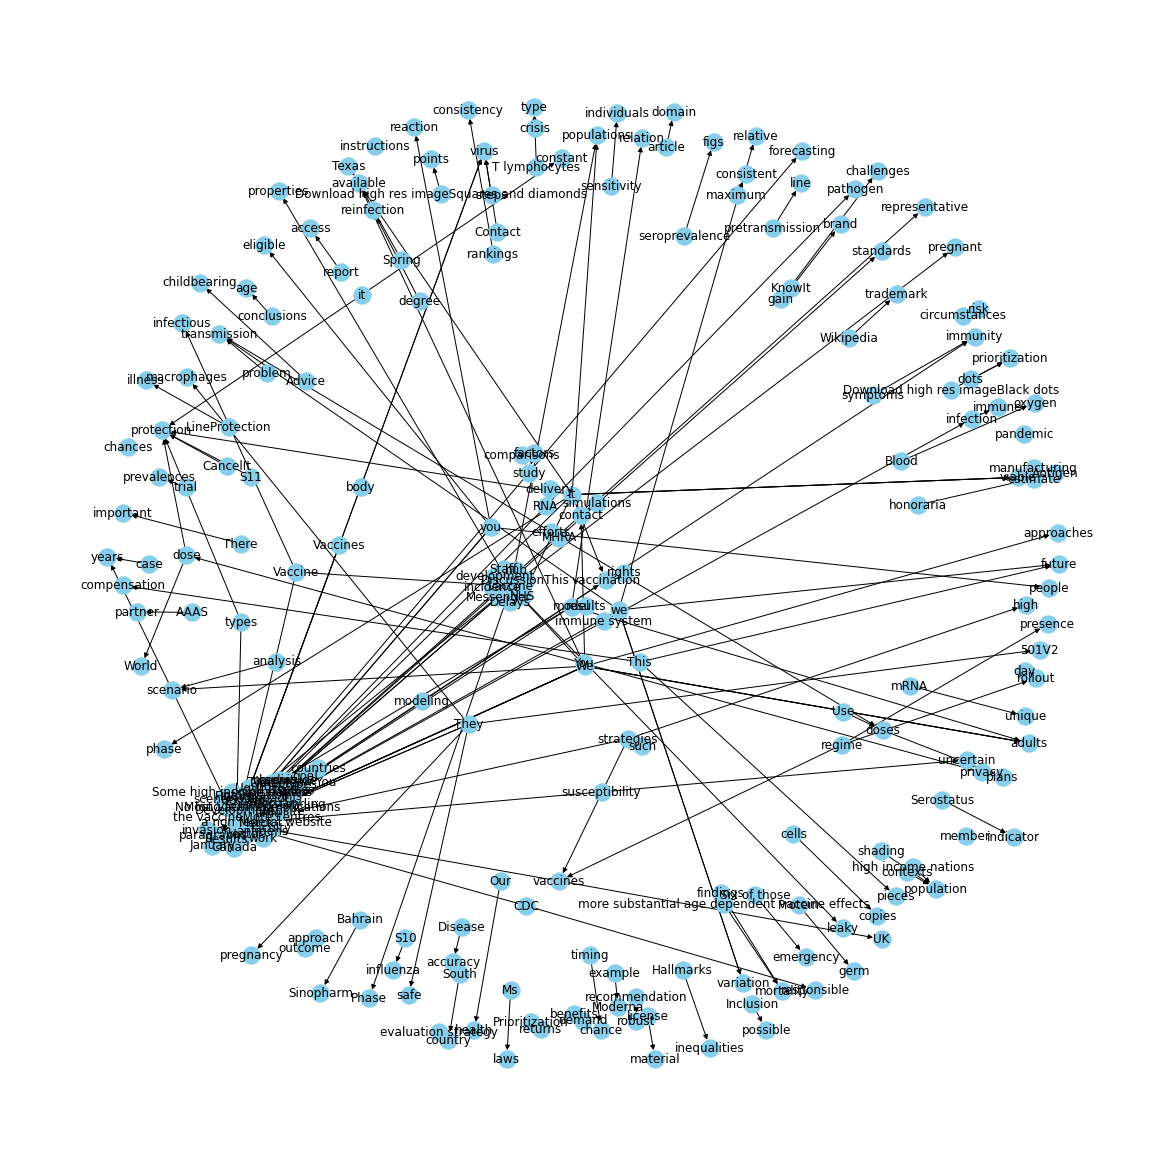

In [ ]:
# rendering a image from the dataframe I have already created in last step

Gp = nx.from_pandas_edgelist(kg_df, "subject", "object", edge_attr=True,
                             create_using=nx.MultiDiGraph)

# rendering the image
plt.figure(figsize=(16,16))
pos = nx.spring_layout(Gp)
nx.draw(Gp, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

Obviously, there are many subjects and objects in the graph, it's not that clear to tell the relations between two entities (subject and object). The topic of this experiment is 'COVID-19 vaccine' so I will check the entity which includes the contents of 'vaccine' or 'COVID-19 vaccine'. 

In [ ]:
# Checking how many times vaccine related words appear in the triples
print(pd.Series(subs).value_counts()[:20])
print()
print(pd.Series(objs).value_counts()[:20])

We               12
It               10
vaccine           9
They              6
we                6
you               5
model             4
Vaccine           3
This              3
Vaccines          3
impact            3
chances           3
vaccines          3
regime            3
strategies        3
CDC               2
types             2
estimate          2
immune system     2
doses             2
dtype: int64

                  70
vaccine           11
protection         6
adults             5
available          4
virus              4
population         3
viable             3
transmission       3
doses              3
vaccines           3
prioritization     3
vaccination        3
chances            3
mortality          2
scenario           2
study              2
future             2
immunity           2
populations        2
dtype: int64


From the above result, for subject position, we can tell the word 'vaccine' appeared 9 times, 'Vaccine' appeared 3 times, 'Vaccines' appeared 3 times, 'vaccines' appeared 3 times. \\
For object position, 'vaccine' appeared 11 times, 'vaccines' appeared 3 times, 'vaccination' appeared 3 times. \\
We will take these datas out of the orginal dataframe and create a new dataframe which is only include vaccine. 

In [ ]:
kg_v1 = kg_df.loc[kg_df['subject']=='vaccine'] # subject is 'vaccine'
kg_v2 = kg_df.loc[kg_df['subject']=='Vaccine']  # subject is 'Vaccine'
kg_v3 = kg_df.loc[kg_df['subject']=='Vaccines'] # subject is 'Vaccines'
kg_v4 = kg_df.loc[kg_df['subject']=='vaccines'] # subject is 'vaccinea'

kg_v5 = kg_df.loc[kg_df['object']=='vaccine'] # object is 'vaccine'
kg_v6 = kg_df.loc[kg_df['object']=='vaccines']  # object is 'vaccines'
kg_v7 = kg_df.loc[kg_df['object']=='vaccination'] # object is 'vaccination'

kg_list = [kg_v1, kg_v2, kg_v3, kg_v4, kg_v5, kg_v6, kg_v7]

# kg_new is the new graph only contains vaccine
kg_new = pd.DataFrame(columns=['subject', 'predicate', 'object'])

for i in kg_list:
  kg_new = kg_new.append(i)

kg_new = kg_new.sort_index() # sort graph contents with index
kg_new.shape

(35, 3)

### 4.3 Visualize Knowledge Graph - 2
After above step we have 35 triples which are related with COVID-19 vaccine. We will visualize the graph again.

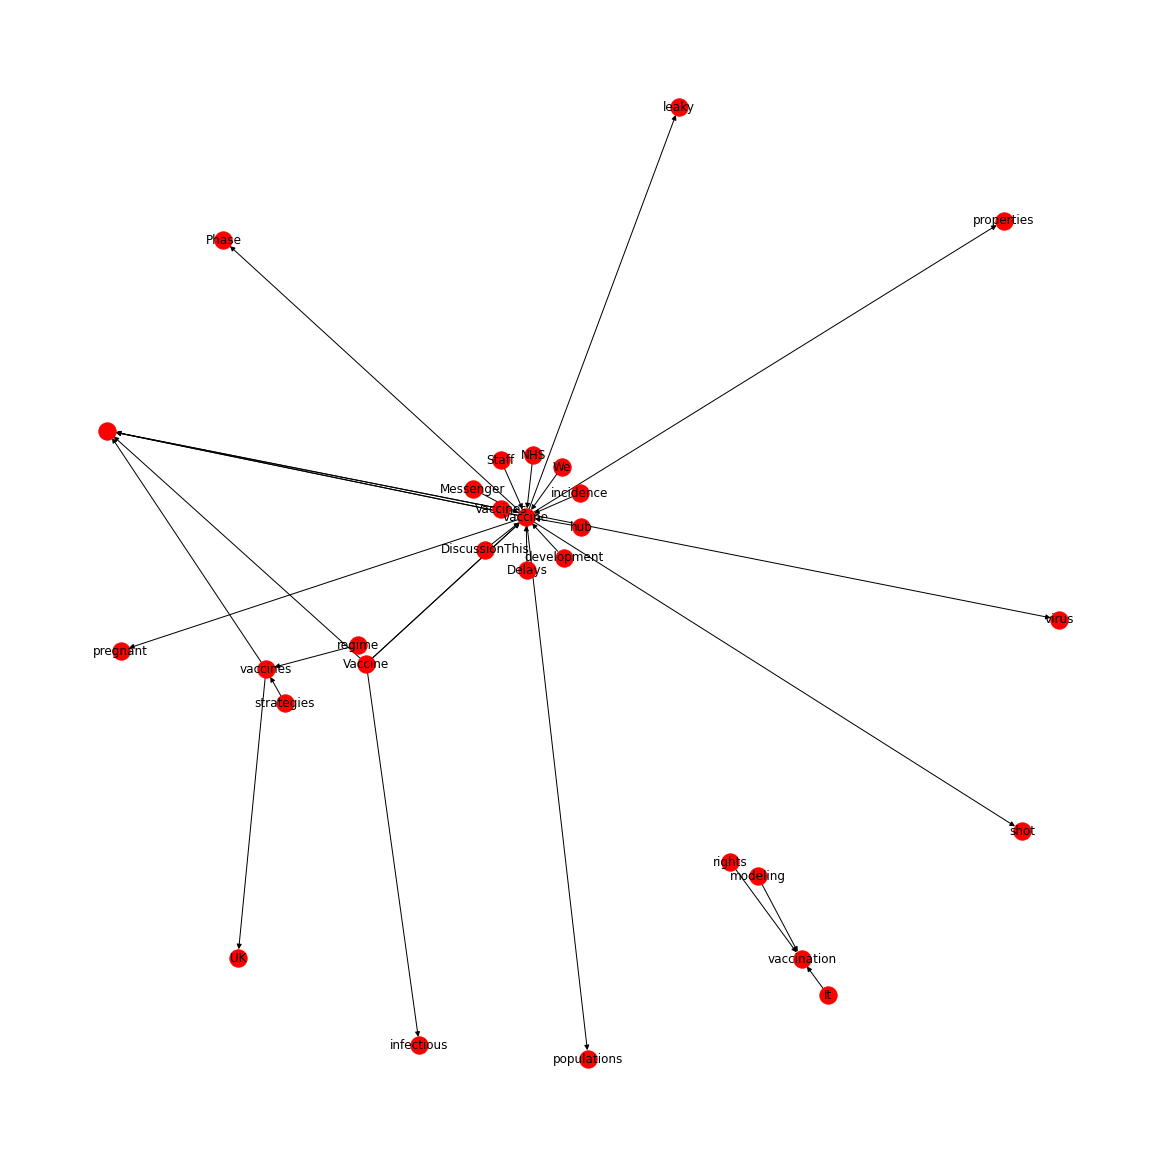

In [ ]:
Gp_v = nx.from_pandas_edgelist(kg_new, "subject", "object", edge_attr=True,
                             create_using=nx.MultiDiGraph)

# rendering the image
plt.figure(figsize=(16,16))
pos = nx.spring_layout(Gp_v)
nx.draw(Gp_v, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

This graph is much more clearer than the first one.  \\
In the graph, we can easily see the relations between each node. Some nodes are empty without contents, which means we can create blank nodes when we do the serilization of knowledge graph. Although some triples are still ambiguous, I think it's relative good sample to do the next step. 

## 5. Serilization

This I am going to map the vacabulary of an entity in a known ontology, if the vacabulary couldn't map in the known ontology, I will assign a new URI to the entity. \
After mapping, I will serialize the graph with the format of N-Triples and Turtle. 


### 5.1 Mapping vacabularies

Here I will check how many triples are in the variable 'kg_new'.

In [ ]:
kg_new

,subject,predicate,object
1,Vaccines,tested,
3,development,producing,vaccine
5,vaccine,go,Phase
9,Messenger,contained,vaccine
13,Vaccines,include,
17,Vaccine,be,infectious
31,rights,provide,vaccination
32,Vaccine,take,vaccine
32,Vaccine,take,vaccine
52,vaccine,is,leaky


I will manually check if the vocabularies above are existing in the known ontology, DBPedia. \
On subject position like vaccine, vaccines means COVID-19 vaccine (in the previous program 'COVID-19' get lost). \
Vaccine, Vaccines on subject position also means vaccine \
On object position, I assume all the words like vaccine, vaccines means COVID-19 vaccine ( It might not be corrected but I currently don't have a good idea to optimize it.) 

In a triple, firstly, I will check if the subject, predicate, and object already have been mapped to dbpedia. If yes, I will manually add the URL on them. Secondly, I will choose a subject or object (usually object) as a new subject of an additional triple, the predicate of this additional triple is a label based on my own namespace, the subject is the contents where the first triple come from. 

I will use rdflib module to do above procedure.

In [16]:
# install reflib
!pip install rdflib

     |████████████████████████████████| 235kB 5.8MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 


In [188]:
# create function to find the original sentences where triples matched with
def find_sent(triple, sentences):
  sub, pre, obj = triple
  for i in sentences:
    if sub in i and pre in i and obj in i:
      sent = i
  return sent

In [189]:
from rdflib import URIRef, BNode, Literal
from rdflib import Graph
from rdflib import Namespace
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD

# define the namespace
dbr = Namespace('http://www.dbpedia.org/resource/')
exp = Namespace('http://www.exp.org/')
expa = Namespace('http://www.exp.org/Action/')
expn = Namespace('http://www.exp.org/Noun/')
OWL.Thing

# create graph
g = Graph()
g.bind('owl', OWL)
g.bind('foaf', FOAF)

OWL.Type
OWL.Thing
exp.label

# based on index 1
# subject operation
Vaccine = dbr.COVID_19_vaccine
vaccine_label = Literal('COVID_19_vaccine')
g.add((Vaccine, OWL.Type, OWL.Thing)) # map on OWL
g.add((Vaccine, RDFS.label, vaccine_label)) # map on RDFS

# predicate operation
tested = expa.tested
tested_label = Literal('tested')
g.add((tested, exp.label, tested_label)) # map on my own namespace

# subject operation
sentence = find_sent(('Vaccine', 'tested', ''), candidate_sentences['sentence']) # find the sentences where the first triple extracted from
process = expn.process # object, also the subject of the additional triple
from_news = exp.label
news = Literal(sentence)

g.add((Vaccine, tested, process)) # first triple
g.add((process, from_news, news)) # additional triple

# index 3
development = URIRef('http://dbpedia.org/resource/COVID-19_vaccine_development')
producing = expa.producing
vaccine = Literal('vaccine@en')
vaccine_label = Literal('vaccine_development@en')
g.add((development, OWL.Type, OWL.Thing))
g.add((development, producing, vaccine))
g.add((development, exp.label, vaccine_label))

# # index 5
vaccine = dbr.COVID_19_vaccine
go = expa.go
Phase = expn.Phase
label = Literal('vaccine_phase@en')
g.add((vaccine, go, Phase))
g.add((vaccine, OWL.Type, OWL.Thing))
g.add((vaccine, exp.label, label))

# index 9
Messager = exp.Messager
contained = expa.contained
g.add((Messager, contained, vaccine))

# index 13
Vaccines = dbr.COVID_19_vaccine
include = expa.include
composition = BNode()
g.add((Vaccines, include, composition))

# index 17
be = expa.be
infectious = expa.infectious
g.add((vaccine, be, infectious))

# index 31
rights = expn.rights
provide = expa.provide
vaccination = exp.vaccination
g.add((rights, provide, vaccination))

# index 32
take = expa.take
g.add((Vaccine, take, vaccine))

# index 52
leaky = Literal('leaky@en')
g.add((vaccine, be, leaky))

# index 68
modeling = expn.modeling
recommending = expa.recommending
g.add((modeling, recommending, vaccination))

# index 74
incidence = expn.incidence
compare = expa.compare
g.add((incidence, compare, vaccination))

# index 76
strategy = exp.strategy
prioritized = expa.prioritized
g.add((strategy, prioritized, vaccine))

# index 78
vaccinated = expa.vaccinated
target = BNode()
g.add((vaccine, vaccinated, target))

# index 83
We = exp.people
varying = expa.very
g.add((We, varying, vaccine))

# index 104
distribting = expa.distribution
obj_people = BNode()
g.add((vaccine, distribting, obj_people))

# index 106
g.add((vaccine, OWL.Type, OWL.Thing))

# index 113
Discussion = expn.discussion
evaluate = expa.evaluate
g.add((Discussion, evaluate, vaccine))

# index 114
accounting = expa.accounting
g.add((vaccine, accounting, vaccine))

# index 119
regime = expn.regime
characterized = expa.characterized
g.add((regime, characterized, vaccine))

# index 121
have = expa.features
properties = BNode()
g.add((vaccine, have, properties))

# index 126, 151
harm = expa.side_affect
populations = expn.populations
g.add((vaccine, harm, populations))

# index 174
it = exp.companies
produce = expa.produce
g.add((it, produce, vaccine))

# index 191
need = expa.need
shot = expa.shot
g.add((vaccine, need, shot))

# index 194
virus = dbr.virus
fight = expa.function
g.add((vaccine, fight, virus))

# index 212
NHS = dbr.nhs
have = expa.who_has
g.add((NHS, OWL.Type, OWL.Thing))
g.add((NHS, have, vaccine))

# index 216
get = expa.not_suit
pregnant = expn.pregnant_woman
g.add((vaccine, get, pregnant))

# index 220
approved = expa.approved
UK = dbr.uk
g.add((UK, approved, vaccine))
g.add((UK, OWL.Type, OWL.Thing))

# index 223
staff = expn.people
giving = expa.get_vaccine
g.add((staff, giving, vaccine))

# index 225
hub = expn.hub
looking = expa.looking_for
g.add((hub, looking, vaccine))

# index 228
limited = expa.bad_affects
bad_affects = BNode()
g.add((vaccine, limited, bad_affects))

### 5.2 Serialization

After all the triples have been added into the graph, serialize the graph with N-Triple an Turtle format, save the output into a .nl file.

In [77]:
print(g.serialize(format='turtle', encoding='utf-8'))
print()
print(g.serialize(format='ntriples', encoding='utf-8'))

g.serialize(destination='serializationTurtle.nt', format='turtle', encoding='utf-8')
g.serialize(destination='serializationNTriples.nt', format='ntriples', encoding='utf-8')

b'@prefix ns1: <http://www.exp.org/Action/> .\n@prefix ns2: <http://www.exp.org/> .\n@prefix owl: <http://www.w3.org/2002/07/owl#> .\n\n<http://dbpedia.org/resource/COVID-19_vaccine_development> ns1:producing "vaccine@en" ;\n    ns2:label "vaccine_development@en" ;\n    owl:Type owl:Thing .\n\n<http://www.dbpedia.org/resource/nhs> ns1:who_has <http://www.dbpedia.org/resource/COVID_19_vaccine> ;\n    owl:Type owl:Thing .\n\n<http://www.dbpedia.org/resource/uk> ns1:approved <http://www.dbpedia.org/resource/COVID_19_vaccine> ;\n    owl:Type owl:Thing .\n\nns2:Messager ns1:contained <http://www.dbpedia.org/resource/COVID_19_vaccine> .\n\n<http://www.exp.org/Noun/discussion> ns1:evaluate <http://www.dbpedia.org/resource/COVID_19_vaccine> .\n\n<http://www.exp.org/Noun/hub> ns1:looking_for <http://www.dbpedia.org/resource/COVID_19_vaccine> .\n\n<http://www.exp.org/Noun/incidence> ns1:compare ns2:vaccination .\n\n<http://www.exp.org/Noun/modeling> ns1:recommending ns2:vaccination .\n\n<http://

## 6. Query and Answer Questions

### 6.1 Query with SPARQL

Let's check if RDF can be queried by SQARQL. 

In [192]:
dbr = Namespace('http://www.dbpedia.org/resource/')
exp = Namespace('http://www.exp.org/')
expa = Namespace('http://www.exp.org/Action/')
expn = Namespace('http://www.exp.org/Noun/')

g_1 = rdflib.Graph()
g.bind("expa", expa)
g.bind("dbr", dbr)
g.bind("exp", exp)

# parse the .rdf file
g.parse('serializationNTriples.nt', format='nt')



# create a query, searching answer for question: 'who has COVID-19 vaccine' --index 212
qres = g.query(
    """SELECT DISTINCT ?s
    WHERE{
      ?s expa:who_has dbr:COVID_19_vaccine
    }"""
)
for row in qres:
  print(row)

(rdflib.term.URIRef('http://www.dbpedia.org/resource/nhs'),)


In [193]:
# more question, 'Is the vaccine tested?' index 1
question = "select ?v ?t ?c \
where{?v rdfs:label 'COVID_19_vaccine'. ?t exp:label 'tested'. ?v ?t ?o. ?o exp:label ?c }"
qres = g.query(question)
for row in qres:
  print(row)

(rdflib.term.URIRef('http://www.dbpedia.org/resource/COVID_19_vaccine'), rdflib.term.URIRef('http://www.exp.org/Action/tested'), rdflib.term.Literal('Vaccines against SARS[12] and MERS[13] have been tested in non-human animals'))


More examples

In [157]:
# create a query, searching answer for question: 'which country approved the vaccine?'
from rdflib.namespace import RDFS

g.bind('rdfs', RDFS)
g.bind('exp', exp)
g.bind('expa', expa)

qres = g.query(
    """SELECT ?country
    WHERE{
      ?country expa:approved dbr:COVID_19_vaccine.
    }"""
)
for row in qres:
  print(row)




(rdflib.term.URIRef('http://www.dbpedia.org/resource/uk'),)


## 7. Conlusion

Above is the almost procedures of the project. However, I do realize that my solution isn't ideal enough. 

Firstly, I didn't notice that I have to represent the extracted triples with resources and sentences. After I did all the process I try to make up it but I only fix the representing of sentence. As the due is approaching I don't have enough time to fix it. I will only write my idea to fix this problem as fellowing:

1. Using dictionary to store the web page content when collecting the web page content from internet. The format of dictionary is: {'resource_1':'webContent_1', 'resource_2':'webContent_2', .....}
2. When saving the sentences into the .csv file, add an additional column name 'resource'. Assign each sentence a resource
3. Extract triples from sentences, if the sentences extracted, save the triple, sentence, resource to a new .csv file.
3. Make a dataframe with pandas model, with a columns of subject, predicate, object, sentence, resource. 
4. Representing the structured data. 


Secondly, I think the process of extracting sentences into triples is a hard part, the quality of the knowledge graph is depending on the quality of triples. However, due to my limited code skill and perception of NLP I couldn't make it better. 

Thirdly, in the question-answering part, I have some clues on how to make it better but I didn't implement them into my program. The following is my idea. 

1. In the real system, we need a reasoning engine. When the user type question with a human linguistic format sentence into the system, the reasoning engine can extract the core information (Here we need NLP technology). For example, in a sentence with different tenses, thesaurus but the same meaning, the engine can recognize it and extract the same core information. 
2. The system will map the core information into the established knowledge graph, the system representing the knowledge with semantics format to the user ( instead of URL in my program). 
3. Moreover, a more advanced reasoning engine could deduce the answer according to the existing knowledge graph ( This may use the knowledge of machine learning but I haven't learnt that ). 